<a href="https://colab.research.google.com/github/klopetx/PHM_python_lectures/blob/main/src/01_Raw_singal_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_python_lectures'


if not os.path.isdir(project_path):

  from google.colab import userdata
  gitpass = userdata.get('gpass')
  mailpass = userdata.get('mailpass')
  mytoken = userdata.get('mytoken')


  !git config --global user.name "klopetx"
  !git config --global user.email "klopetx@gmail.com"
  !git config --global user.password gitpass


  token = mytoken
  username = 'klopetx'
  repo = 'PHM_python_lectures'


  !git clone https://{token}@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

FEMTO dataset is already downloaded.


# Getting familiar with the dataset

FEMTO bearings is a well known dataset used during the IEEE Prognostics and Heath Monitoring context 2012.

Have a look on the documentation and try to answer the following questions.

*   [Paper:](https://hal.science/hal-00719503/document)
*   [Challenge documentation:](https://github.com/wkzs111/phm-ieee-2012-data-challenge-dataset/blob/master/IEEEPHM2012-Challenge-Details.pdf)









## Question time



1)   What sensors where used during the tests?

2)   Which frequencies were used for the acquisition?

3)   Why do you think the frequencies differ?

# Data preparation

From all the data we donwloaded, we will just read and combine some of eat so that we can inspect the raw signals.

Just run the following chunk:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the top-level directory '10. FEMTO Bearing' is in the current working directory
base_dir = 'data/10. FEMTO Bearing'  # This path needs to be the correct path where the folders are

def process_acc_files(base_dir, first_only =True):

    # Initialize an empty DataFrame to concatenate all first 'acc' CSVs
    all_data = pd.DataFrame()

    # Traverse the directory structure
    for subdir, dirs, files in os.walk(base_dir):
        # Sort the files to ensure we are getting the first one when using 'acc' prefix
        sorted_files = sorted(files)
        for file in sorted_files:
            # Check if the file starts with 'acc' and is a CSV
            if file.startswith('acc') and file.endswith('.csv'):
                # Construct the full file path
                file_path = os.path.join(subdir, file)
                # Read the CSV file
                df = pd.read_csv(file_path, header=None)  # Assuming there is no header row

                # Parse the folder name to get the bearing name
                bearing_name = os.path.basename(subdir)

                # Add additional columns for 'bearing' and 'file_name'
                df['bearing'] = bearing_name
                df['file_name'] = file_path

                # Concatenate the individual dataframe to the main dataframe
                all_data = pd.concat([all_data, df], ignore_index=True)

                # Optionally break after adding the first 'acc' file
                if first_only:
                    break

    # Additional processing
    all_data.rename(columns={all_data.columns[4]: 'AccX', all_data.columns[5]: 'AccY'}, inplace=True)
    all_data['OP_Condition'] = all_data['bearing'].str.extract(r'Bearing(\d+)_')[0]
    all_data['OPC_Test_Number'] = all_data['bearing'].str.extract(r'Bearing\d+_(\d+)')[0]

    return all_data


all_data = process_acc_files(base_dir, True)

print(all_data.head())

   0     1    2         3   AccX   AccY     bearing  \
0  8  47.0  5.0  196910.0  0.050 -0.253  Bearing1_2   
1  8  47.0  5.0  196950.0  0.165 -0.140  Bearing1_2   
2  8  47.0  5.0  196990.0  0.125  0.542  Bearing1_2   
3  8  47.0  5.0  197030.0  0.157 -0.261  Bearing1_2   
4  8  47.0  5.0  197070.0  0.421  0.081  Bearing1_2   

                                           file_name OP_Condition  \
0  data/10. FEMTO Bearing/Learning_set/Bearing1_2...            1   
1  data/10. FEMTO Bearing/Learning_set/Bearing1_2...            1   
2  data/10. FEMTO Bearing/Learning_set/Bearing1_2...            1   
3  data/10. FEMTO Bearing/Learning_set/Bearing1_2...            1   
4  data/10. FEMTO Bearing/Learning_set/Bearing1_2...            1   

  OPC_Test_Number  
0               2  
1               2  
2               2  
3               2  
4               2  


In [3]:
all_data.OP_Condition.value_counts()

OP_Condition
1    30720
2    30720
3    10240
Name: count, dtype: int64

# Visualization

Now that he have a single dataframe, we can plot different raw signals.

Remenmber that data are acquired under three operating conditions (rotating speed and load force):

- Condition 1. 1800 rpm and 4000 N: folders Bearing1_x
- Condition 2. 1650 rpm and 4200 N: folders Bearing2_x
- Condition 3. 1500 rpm and 5000 N: folders Bearing3_x

I will show you how to plot some signals one on the top of the other. Look:




## Getting a subset of the data

We will first create a subset of the data. For that:

1) We will display all the unique file_name values that were read.

2) Then, we will take the first and second file.

3) Finally, we we filter the dataset to keep just the file_names we just decided.

In [4]:
unique_files = all_data.file_name.value_counts()
print(unique_files)


file_name
data/10. FEMTO Bearing/Learning_set/Bearing1_2/acc_00001.csv     2560
data/10. FEMTO Bearing/Learning_set/Bearing3_2/acc_00001.csv     2560
data/10. FEMTO Bearing/Test_set/Bearing2_5/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_3/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_7/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing3_3/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_4/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_6/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_6/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_3/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing1_5/acc_00001.csv         2560
data/10. FEMTO Bearing/Test_set/Bearing2_4/acc_00001.csv         2560
data/10. FEMTO Bearing/Full_Test_Set/Bearing2_7/acc_00001.csv    2560
data/10. FEMTO Bearing/Full_Test_Set/Bearing2_5/acc_00001.csv    2560
data/10. F

In [5]:

first_file = unique_files.index[0]
print(first_file)

second_file = unique_files.index[4]
print(second_file)


data/10. FEMTO Bearing/Learning_set/Bearing1_2/acc_00001.csv
data/10. FEMTO Bearing/Test_set/Bearing1_7/acc_00001.csv


## Plotting the data from different experiments

Now, taking that subset of the data we will just plot it using **matplotlib**, a popular visualization package in python.




In [6]:
def plot_time_series(all_data, file_names, column_index):
    """
    Plots values over time for the specified files and column index in 'all_data'.

    Parameters:
    - all_data (pd.DataFrame): DataFrame containing the data, including 'file_name' and data columns.
    - file_names (list of str): List of file names to plot.
    - column_index (int): Index of the column to plot.
    """

    # Filter rows for the specified file names
    files_to_print = all_data[all_data.file_name.isin(file_names)].copy()

    # Add a 'Time' column based on the order of rows within each file
    files_to_print['Time'] = files_to_print.groupby('file_name').cumcount() + 1

    # Generate unique colors for each file name
    colors = plt.cm.jet(np.linspace(0, 1, len(file_names)))

    plt.figure(figsize=(10, 5))  # Sets the figure size

    # Plots each time series with a different color
    for file_name, color in zip(file_names, colors):
        subset = files_to_print[files_to_print['file_name'] == file_name]
        plt.plot(subset['Time'], subset.iloc[:, column_index], label=file_name, color=color)

    plt.title('Time Series Plot by File Name')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()  # Shows the legend with file names
    plt.show()

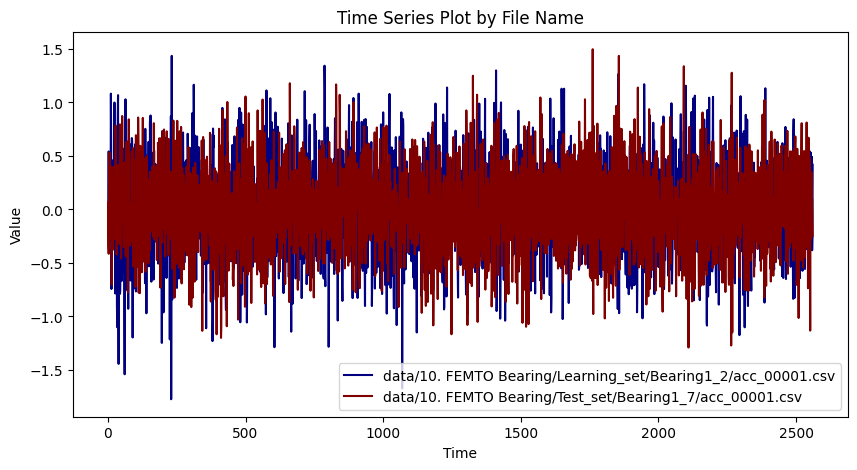

In [7]:
plot_time_series(all_data,  [first_file, second_file], 5)

### Exercise

You have seen some differences on the previous signals.
Do you think this difference will be bigger when comparing operation 1 against 3?

4) Create a code chunk that visualizes the signals of two different conditions to answer this question.





## Plotting the data from the same experiment over time

Now, instead of comparing single raw files, we will see what happens when through the duration of a single run to failure test. For that, we will read some of the files and combine the data of a single experiment.




In [8]:

def concatenate_files(directory_path, file_prefix, one_in=1):
    """
    Concatenates files in the specified directory that start with the given prefix into a single DataFrame,
    selecting files according to the 'one_in' parameter. Logs the number of listed and read files.

    Parameters:
    - directory_path (str): The path to the directory containing the files.
    - file_prefix (str): The prefix of the files to be concatenated (e.g., 'acc_' or 'temp_').
    - one_in (int): Interval of files to be read. For example, one_in=2 reads every second file.

    Returns:
    - pd.DataFrame: A DataFrame containing the concatenated data from the selected files.
    """

    concatenated_df = pd.DataFrame()
    files_to_read = [filename for filename in os.listdir(directory_path) if filename.startswith(file_prefix)]
    files_to_read.sort()  # Ensure files are processed in order
    print(f"Total number of listed files with prefix '{file_prefix}': {len(files_to_read)}")

    files_read = 0  # Initialize counter for the number of files actually read
    for i, filename in enumerate(files_to_read):
        if i % one_in == 0:  # Process file based on one_in interval
            file_path = os.path.join(directory_path, filename)
            temp_df = pd.read_csv(file_path, header = None)
            temp_df['file_name'] = file_path
            concatenated_df = pd.concat([concatenated_df, temp_df], ignore_index=True)
            files_read += 1  # Increment the counter

    print(f"Number of files read (based on one_in={one_in}): {files_read}")

    return concatenated_df


In [9]:
path = "/content/PHM_python_lectures/data/10. FEMTO Bearing/Learning_set/Bearing1_1"
file_prefix = 'acc_'
one_in = 500  # Change as needed to read every second, third, etc., file

df = concatenate_files(path, file_prefix, one_in)

Total number of listed files with prefix 'acc_': 2803
Number of files read (based on one_in=500): 6


In [10]:
target_files = df.file_name.value_counts().index

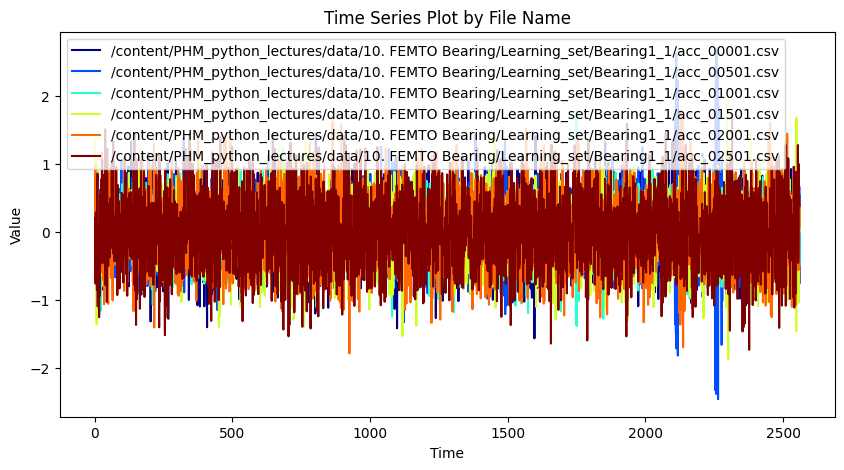

In [11]:
plot_time_series(df,  target_files, 5)


In addition, we will also plot the evolution of the temperature of this same experiment.

Total number of listed files with prefix 'temp_': 466
Number of files read (based on one_in=75): 7


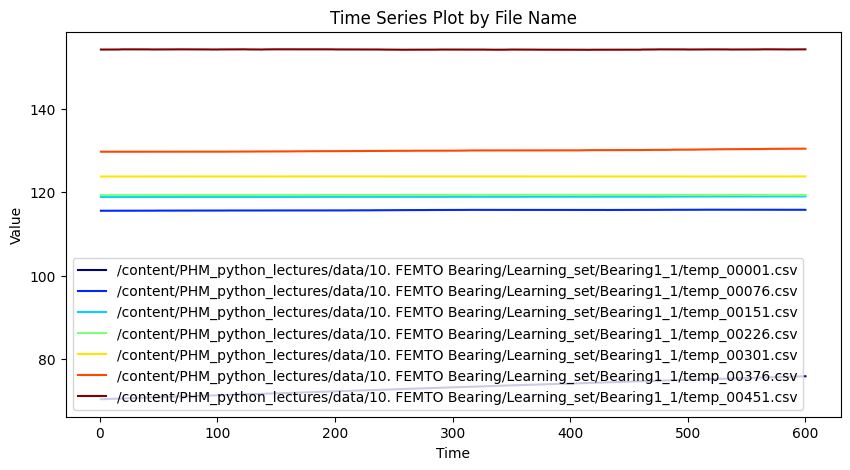

In [12]:

path = "/content/PHM_python_lectures/data/10. FEMTO Bearing/Learning_set/Bearing1_1"
file_prefix = 'temp_'
one_in = 75  # Change as needed to read every second, third, etc., file

df = concatenate_files(path, file_prefix, one_in)

target_files = df.file_name.value_counts().index

plot_time_series(df,  target_files, 4)



### Question time

5) Do you see any clear pattern of degradation?

6) How would you sinthesise the information of a raw signal?



# Before submitting the notebook

 - Remembenber to re-start the session and run all the code to ensure there are no errors.